In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

dff = pd.read_csv('prepared_data.csv')

In [2]:
pollutant_keys = ['NO2','O3','SO2','CO']
pollutant_vals = [' Full Mean (standard)',' Full 1st Max Value (standard)',' Full 1st Max Hour (standard)']
all_indicators = []
for x1 in pollutant_keys:
    for x2 in pollutant_vals:
        all_indicators.append(x1+x2)
        
targets = [x + pollutant_vals[0] for x in pollutant_keys]

def func_time2(x):
    return datetime.strptime(x,'%Y-%m-%d')

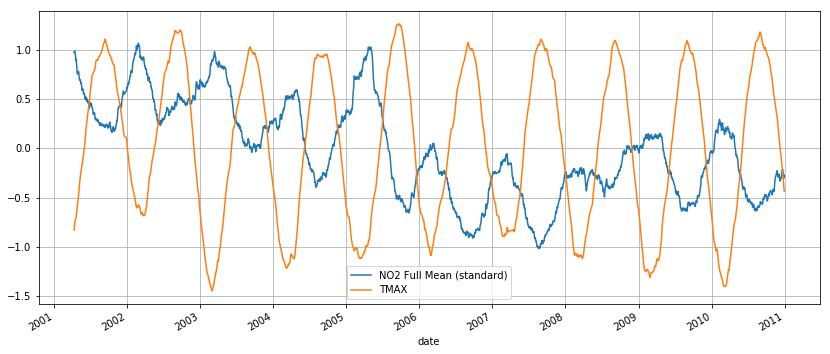

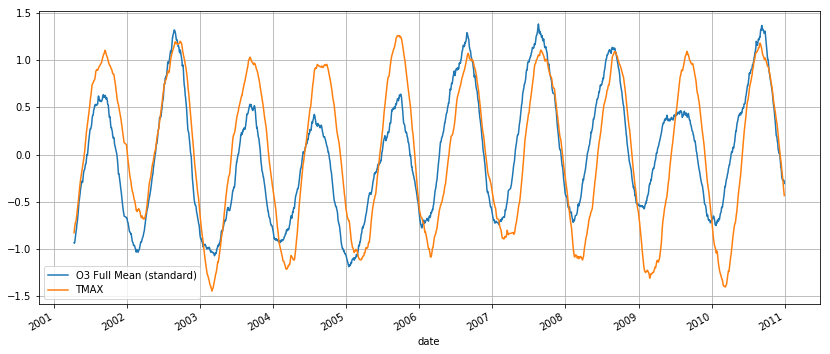

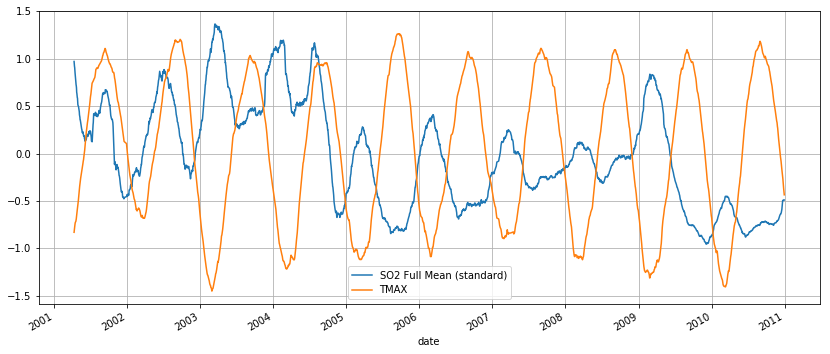

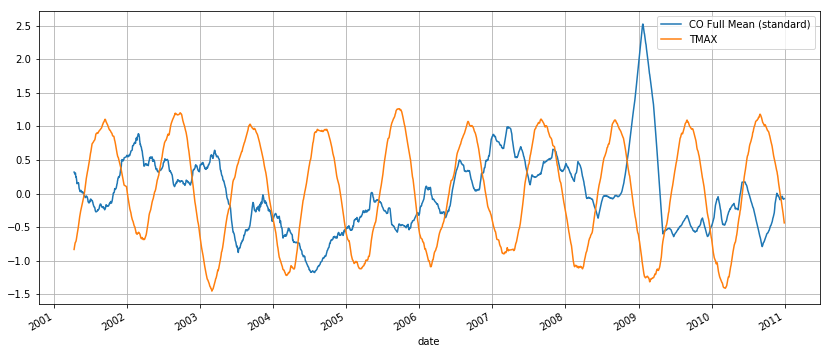

In [3]:
# Find if any seasonal pattern


# To find relationship between TMAX(maximum temperature) and the pollutants， we do some visualization.
# 1) Scale the data using Z-score
# 2) smooth the data using rolling window =100
# From the plot we can see NO2, SO2 and CO has a positive relationship between maximum temperature, while O3 has a 
# negative relationship. 
# More specifically, the pollutants have seasonal pattern. 


def plot_temp_target(target):
    dd = dff.copy()
    dd['date'] = dd['date'].apply(func_time2)
    dd.index = dd['date']
    dd = dd[[target,'TMAX']].copy()
    dd = (dd-dd.mean())/dd.std()
    dd = dd.rolling(window=100).mean()
    dd.plot(figsize=(14,6),grid=True)
    
for target in targets:
    plot_temp_target(target)

In [4]:
# Trend

dd = dff.copy()
dd.index
dd = dd.iloc[1:,:]
dd = dd.groupby(['year']).mean().reset_index()
dd[['year'] + targets]

,year,NO2 Full Mean (standard),O3 Full Mean (standard),SO2 Full Mean (standard),CO Full Mean (standard)
0,2001.0,24.474311,0.020936,6.651349,1.075424
1,2002.0,24.441036,0.024150,6.712709,1.158795
2,2003.0,22.640754,0.019372,8.323187,0.896370
3,2004.0,20.956404,0.019498,6.475045,0.617589
4,2005.0,20.836788,0.021644,4.483953,0.848892
5,2006.0,15.966560,0.026704,4.525003,1.115848
6,2007.0,15.324811,0.028543,5.019857,1.195519
7,2008.0,18.057799,0.026468,5.556448,1.221562
8,2009.0,18.302954,0.023656,4.529060,0.865725
9,2010.0,17.606046,0.028296,3.361641,0.883524


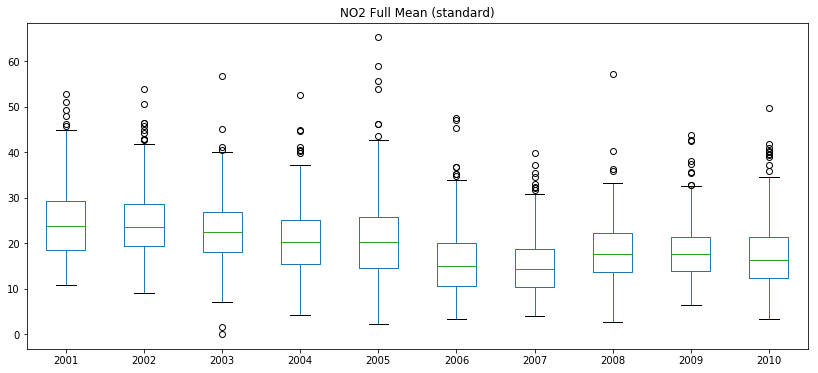

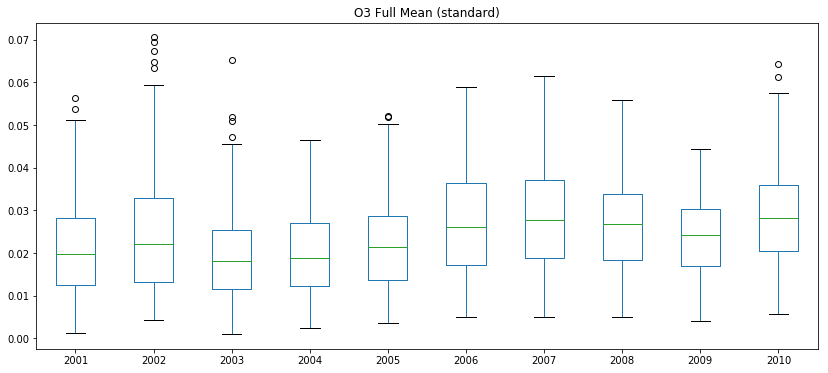

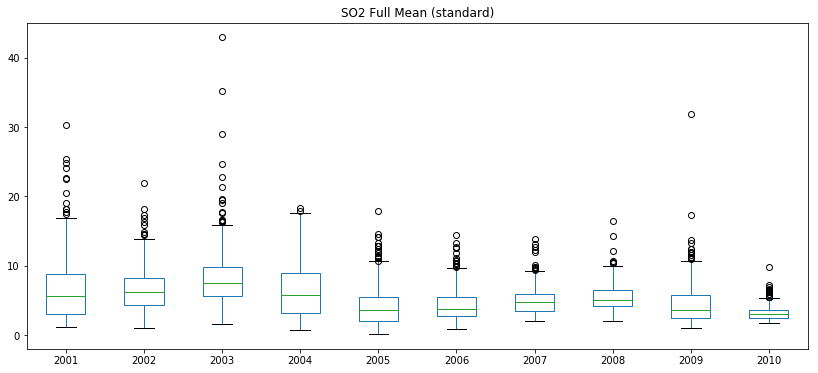

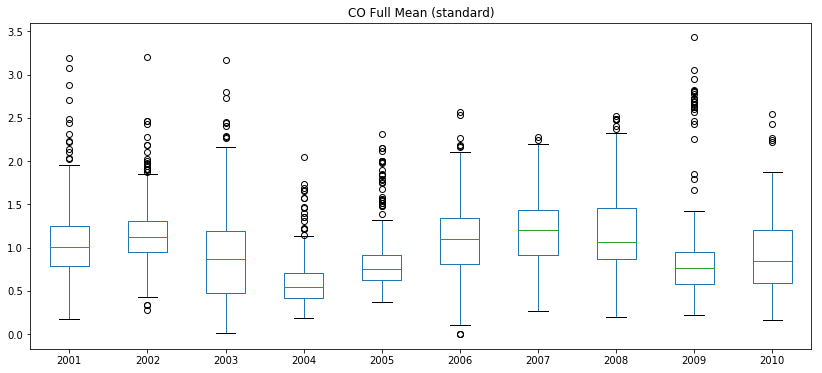

In [5]:
# from the boxplot we can find more informations, and we can also see some trend, and some outliers.

# NO2 has an overall downward trend, O3 has fewer outliers than other pollutants, CO has so many outliers, and may have a longer time pattern. 
def plot_year_box(target):
    dd = dff.copy()
    dd = dd.iloc[1:,:]
    dd = dd[['year',target]]
    all_years = sorted(list(set(list(dd['year'].astype(int).astype(str)))))

    ddd = pd.DataFrame(columns=all_years)
    for y in all_years:
        temp = dd[dd['year']==float(y)].reset_index()
        ddd[y] = temp[target]

    ddd.plot.box(figsize=(14,6),title=target)
    
for target in targets:
    plot_year_box(target)

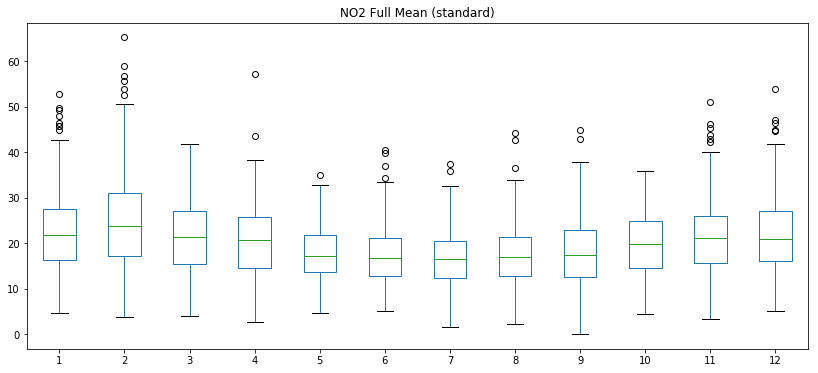

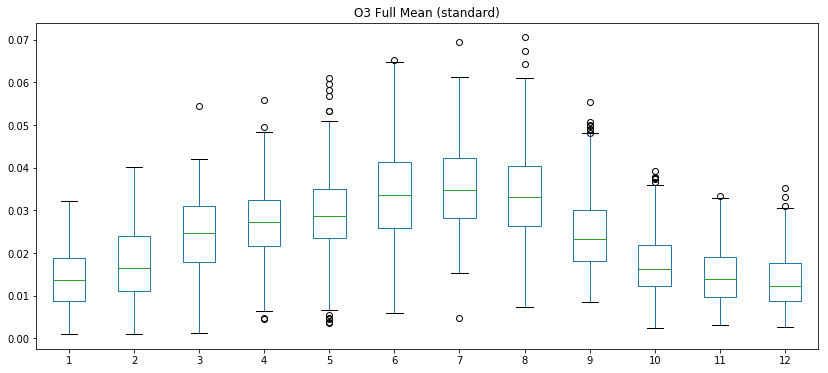

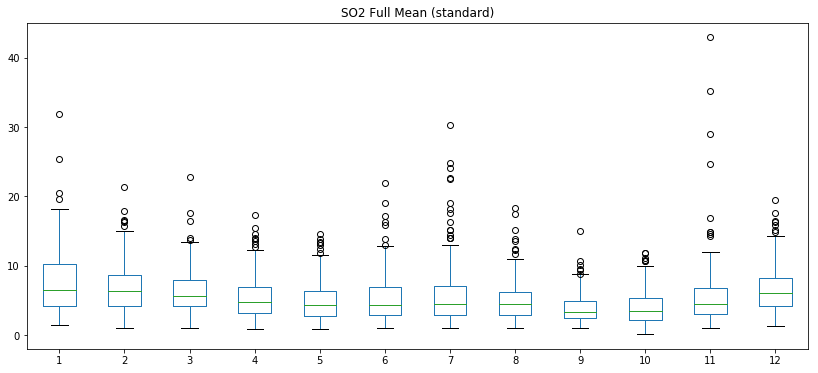

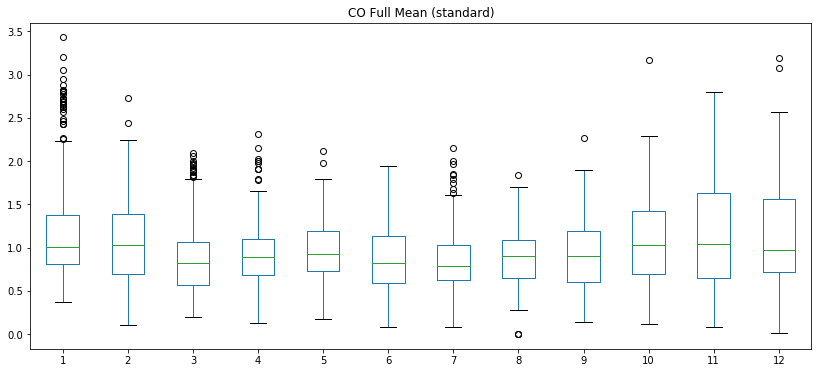

In [6]:
def plot_month_box(target):
    dd = dff.copy()
    dd = dd.iloc[1:,:]
    dd = dd[['month',target]]
    all_months = sorted(list(set(list(dd['month'].astype(int)))))

    ddd = pd.DataFrame(columns=all_months)
    for y in all_months:
        temp = dd[dd['month']==float(y)].reset_index()
        ddd[y] = temp[target]

    ddd.plot.box(figsize=(14,6),title=target)
    
for target in targets:
    plot_month_box(target)

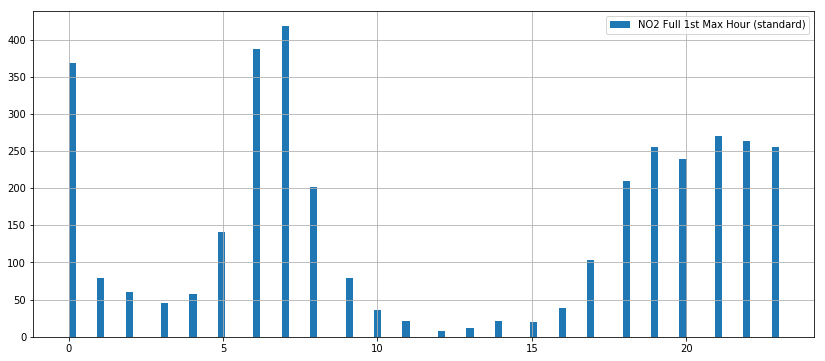

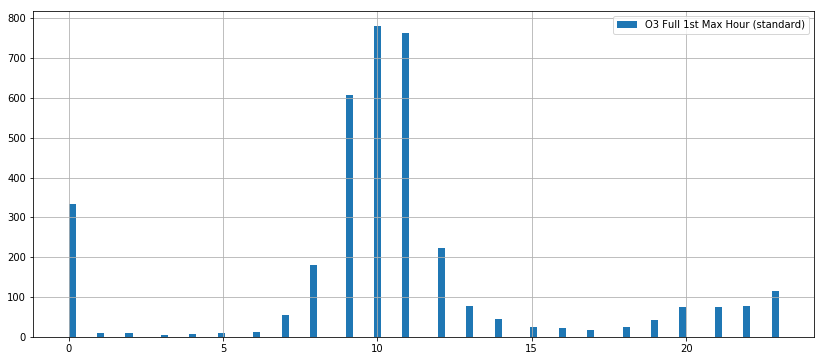

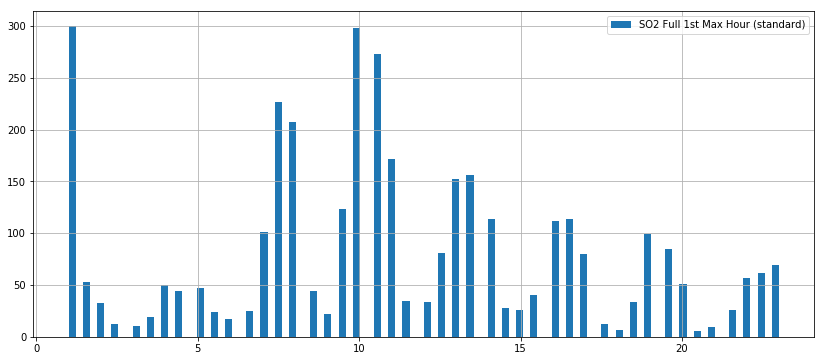

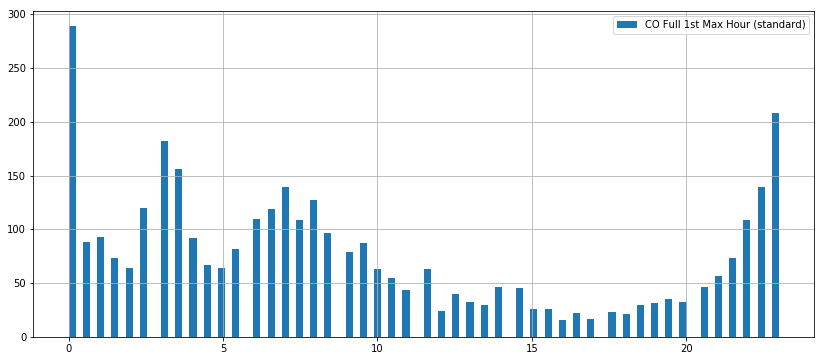

In [7]:
targets2 = [x + pollutant_vals[2] for x in pollutant_keys]
dd = dff.copy()
dd = dd[targets2]
for target in targets2:
    dd[target].hist(bins=100,figsize=(14,6))
    plt.legend([target])
    plt.show()